**Vamos experimentar agora o algoritmo Decision Tree?**

In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pickle
with open('/content/sample_data/restaurante.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [ ]:
modelo = DecisionTreeClassifier(criterion='gini')
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier()



> **Vamos testar o modelo?**



In [ ]:
previsoes = modelo.predict(X_teste)

In [ ]:
previsoes

array(['Nao', 'Nao', 'Nao'], dtype=object)



> **Será se o modelo acertou?**



In [ ]:
y_teste

array(['Nao', 'Sim', 'Nao'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.6666666666666666

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[2, 0],
       [1, 0]])

0.6666666666666666

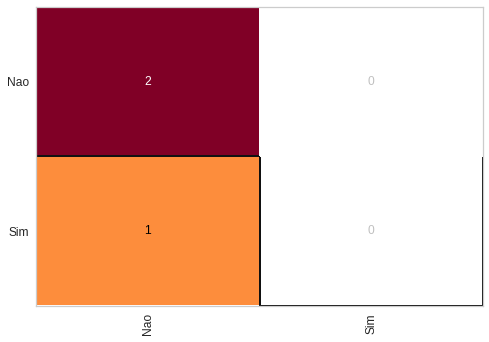

In [ ]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Nao       0.67      1.00      0.80         2
         Sim       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


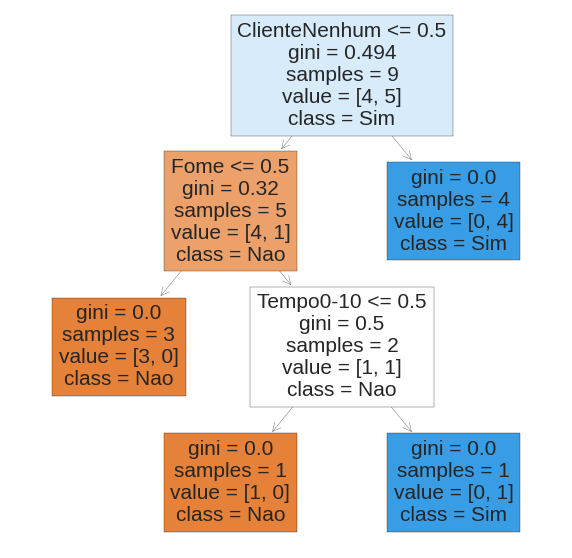

In [ ]:
from sklearn import tree
previsores = ['ClienteAlguns', 'ClienteNenhum', 'ClienteCheio', 'TipoHamburguer', 'TipoTailandes', 'TipoFrances', 'TipoItaliano', 'PrecoR', 'PrecoRR', 'PrecoRRR', 'Reserva', 'Tempo0-10', 'Tempo10-30', 'Tempo30-60', 'Tempo>60', 'Alternativa', 'Bar', 'Sex/Sab', 'Fome', 'Chuva']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(13,13))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True);
